<a href="https://www.kaggle.com/code/osmantekdamar/titanic?scriptVersionId=218358422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Itroduction
The Titanic was a British passenger liner that famously sank on its maiden voyage in April 1912. Here is a summary of the Titanic story:

1. Construction and Maiden Voyage:
   - The Titanic was one of three sister ships, along with the RMS Olympic and HMHS Britannic, built by the White Star Line.
   - It was touted as the most luxurious and largest ship of its time, with advanced safety features.

2. Departure and Passengers:
   - The Titanic left Southampton, England, on April 10, 1912, and made stops in Cherbourg, France, and Queenstown (now known as Cobh), Ireland, before heading to New York City.
   - Onboard were over 2,200 passengers and crew members, including many wealthy and prominent individuals.

3. Collision with an Iceberg:
   - On the night of April 14, 1912, the Titanic struck an iceberg in the North Atlantic Ocean.
   - The collision damaged the ship's hull, leading to the flooding of several compartments below deck.

4. Sinking:
   - Despite efforts to slow the sinking and evacuate passengers, there were not enough lifeboats for everyone on board.
   - The Titanic sank in the early hours of April 15, 1912, just over two hours after hitting the iceberg.

5. Rescue:
   - The nearby RMS Carpathia received distress signals and rushed to the scene.
   - Over 700 survivors were rescued from lifeboats, but more than 1,500 people perished in the disaster.

6. Aftermath:
   - The sinking of the Titanic was a profound tragedy that shocked the world and prompted significant changes in maritime safety regulations.
   - Investigations revealed shortcomings in the ship's design, safety measures, and the handling of the emergency.

7. Cultural Impact:
   - The Titanic disaster has inspired numerous books, films, and documentaries, including James Cameron's 1997 movie "Titanic."
   - It remains a symbol of human hubris and the consequences of disregarding safety measures.

The sinking of the Titanic is a well-known and tragic event in history, and its legacy continues to captivate people's imaginations and serve as a cautionary tale about the importance of safety at sea.

Here is a simple sketch of that epic ship

![Map](https://i.pinimg.com/originals/73/90/a6/7390a6730ca3c56602bc0495910c1a54.png)

<font color= "blue">
Content:

1. [Load and Check Data](#1)
1. [Variable Description and Basic Data Analysis](#2)
    * [Categorical Variable](#3)
    * [Numerical Variable](#4)
    * [Cardinal Variable](#5)
1. [Outlier Detection](#6)
1. [Missing Value](#7)
    * [Find Missing Value](#8)
    * [Fill Missing Value](#9)
1. [Visualization](#10)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#11)
    * [SibSp -- Survived](#12)
    * [Parch -- Survived](#13)
    * [Pclass -- Survived](#14)
    * [Age -- Survived](#15)
    * [Pclass -- Survived -- Age](#16)
    * [Embarked -- Sex -- Pclass -- Survived](#17)
    * [Embarked -- Sex -- Fare -- Survived](#18)
    * [Fill Missing: Age Feature](#19)
1. [Feature Engineering](#20)
    * [Name -- Title](#21)
    * [Family Size](#22)
    * [Embarked](#23)
    * [Ticket](#24)
    * [Pclass](#25)
    * [Sex](#26)
    * [Drop Passenger ID and Cabin](#27)
1. [Modeling](#28)
    * [Train - Test Split](#29)
    * [Simple Logistic Regression](#30)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#31)
    * [Ensemble Modeling](#32)
    * [Prediction and Submission](#33)

In [357]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Helper Functions

In [358]:
def analyze_data(dataframe, cat_th=10, car_th=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set. It also performs incomplete data analysis.
    Parameters
    ------
        dataframe: dataframe
            The dataframe from which variable names are to be retrieved
        cat_th: int, optional
            Class threshold value for numeric but categorical variables
        car_th: int, optional
            Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
            Categorical variable list
        num_cols: list
            Numerik değişken listesi
        cat_but_car: list
            Categorical view cardinal variable list
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]

    num_but_cat = [col for col in num_cols if dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in cat_cols if dataframe[col].nunique() > car_th]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    cat_cols = cat_cols + num_but_cat
    
    print(f"Number of Observations: {dataframe.shape[0]}")
    print(f"Number of Variables: {dataframe.shape[1]}")
    print(f'Cat cols: {len(cat_cols)}, Num cols: {len(num_cols)}, Cat but car cols: {len(cat_but_car)}')
    print("\nMissing Data")
    print(dataframe.isna().sum())

    return cat_cols, num_cols, cat_but_car

In [359]:
def analyze_categorical_features(train_data, cat_cols, target_feature):
    figures_dict = {}
    
    for feature in cat_cols:
        # Value Counts Plot
        value_counts = train_data[feature].value_counts().reset_index()
        value_counts.columns = [feature, 'Adet']
        
        fig1, ax1 = plt.subplots(figsize=(18, 6))
        sns.barplot(data=value_counts, x=feature, y='Adet', ax=ax1)
        ax1.set_title(f'{feature} Value Counts')
        ax1.tick_params(axis='x', rotation=45)
        figures_dict[f'{feature}_value_counts'] = fig1
        
        # Relationship Count Plot
        cross_table = pd.crosstab(train_data[feature], train_data[target_feature])
        cross_table_melted = cross_table.reset_index().melt(
            id_vars=feature, 
            var_name=target_feature, 
            value_name='Count'
        )
        
        fig2, ax2 = plt.subplots(figsize=(18, 6))
        sns.barplot(
            data=cross_table_melted, 
            y=feature, 
            x='Count', 
            hue=target_feature, 
            ax=ax2
        )
        ax2.set_title(f'{feature} vs {target_feature} Relationship (Counts)')
        ax2.legend(title=target_feature)
        figures_dict[f'{feature}_{target_feature}_counts'] = fig2
        
        
        
        # Close figures to prevent memory leaks
        plt.close(fig1)
        plt.close(fig2)
        
    return figures_dict

In [360]:
def analyze_numerical_features(train_data, num_cols, target_feature):
    """
    Analyze numerical features using Seaborn visualizations and statistical analysis
    
    Parameters:
    train_data (pd.DataFrame): Input DataFrame
    num_cols (list): List of numerical column names
    target_feature (str): Target variable name
    
    Returns:
    dict: Dictionary containing figure objects and statistical summaries
    """
    figures_dict = {}
    sns.set_style("whitegrid")
    
    for feature in num_cols:
        # Distribution Plot
        fig_dist, ax_dist = plt.subplots(figsize=(18, 6))
        sns.histplot(data=train_data, x=feature, kde=True, ax=ax_dist)
        ax_dist.set_title(f'{feature} Distribution')
        figures_dict[f'{feature}_distribution'] = fig_dist
        plt.close(fig_dist)
        
        # Comparative Boxplot
        fig_box, ax_box = plt.subplots(figsize=(18, 6))
        sns.boxplot(data=train_data, x=target_feature, y=feature, 
                   palette='Set3', ax=ax_box, legend=False, hue=target_feature)
        ax_box.set_title(f'{feature} Distribution by {target_feature}')
        figures_dict[f'{feature}_boxplot'] = fig_box
        plt.close(fig_box)
        
        # Comparative Violin Plot
        fig_violin, ax_violin = plt.subplots(figsize=(18, 6))
        sns.violinplot(data=train_data, x=target_feature, y=feature, 
                      palette='Set3', ax=ax_violin,legend=False, hue=target_feature)
        ax_violin.set_title(f'{feature} Density Distribution by {target_feature}')
        figures_dict[f'{feature}_violin'] = fig_violin
        plt.close(fig_violin)
        
        # Mean Comparison with Confidence Intervals
        fig_mean, ax_mean = plt.subplots(figsize=(18, 6))
        sns.barplot(data=train_data, x=target_feature, y=feature, 
                   palette='Set3', errorbar=('ci', 95), ax=ax_mean, legend=False, hue=target_feature)
        ax_mean.set_title(f'Mean {feature} by {target_feature}')
        ax_mean.set_ylabel('Mean Value')
        figures_dict[f'{feature}_mean_comparison'] = fig_mean
        plt.close(fig_mean)
        
        # Outlier Analysis
        Q1 = train_data[feature].quantile(0.25)
        Q3 = train_data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = train_data[feature].between(lower_bound, upper_bound, inclusive='neither')
        
        # Outlier-Target Relationship
        fig_heat, ax_heat = plt.subplots(figsize=(18, 6))
        crosstab = pd.crosstab(~outliers, train_data[target_feature], normalize='index')
        sns.heatmap(crosstab, annot=True, fmt='.2%', cmap='YlOrRd', ax=ax_heat)
        ax_heat.set_title(f'Outlier Impact on {target_feature} for {feature}')
        ax_heat.set_xlabel(target_feature)
        ax_heat.set_ylabel('Is Outlier')
        figures_dict[f'{feature}_outlier_heatmap'] = fig_heat
        plt.close(fig_heat)
        
        # Statistical Analysis
        stats_info = {}
        stats_info['normality'] = stats.normaltest(train_data[feature].dropna())[:2]
        stats_info['descriptive'] = train_data[feature].describe().to_dict()
        stats_info['outliers'] = {
            'count': (~outliers).sum(),
            'percentage': (~outliers).mean() * 100
        }
        
        if len(train_data[target_feature].unique()) == 2:
            groups = train_data[target_feature].unique()
            group_a = train_data[train_data[target_feature] == groups[0]][feature]
            group_b = train_data[train_data[target_feature] == groups[1]][feature]
            stats_info['mann_whitney'] = stats.mannwhitneyu(group_a, group_b)[:2]
        
        figures_dict[f'{feature}_stats'] = stats_info
        
    return figures_dict

In [361]:
def check_outliers(data, columns, threshold=1.5):
    """
    Check for outliers in multiple columns of a DataFrame.
    
    Parameters:
    - data: DataFrame containing the data.
    - columns: List of column names to check for outliers.
    - threshold: Multiplier for the IQR (Interquartile Range) to determine outliers.
    
    Returns:
    - outliers_dict: A dictionary where keys are column names and values are lists of outliers' indices.
    """
    outliers_dict = {}
    
    for col in columns:
        # Calculate the IQR (Interquartile Range) for the column
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Find the indices of outliers in the column
        outliers_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index.tolist()
        
        # Store the outliers in the dictionary
        outliers_dict[col] = outliers_indices
    
    return outliers_dict

In [362]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

<a id = "1"></a>
# Load and Check Data

In [363]:
#!pip install kagglehub

In [364]:
import kagglehub.competition
path = kagglehub.competition.competition_download('titanic')

In [365]:
train_data = pd.read_csv(f"{path}/train.csv")
test_data = pd.read_csv(f"{path}/test.csv")
submission = test_data[["PassengerId"]]
train_data.drop("PassengerId", axis = 1, inplace = True)
test_data.drop("PassengerId", axis = 1, inplace = True)

In [366]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [367]:
train_data.describe([0.10, 0.25, 0.50, 0.75, 0.90]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
Survived,891.0,0.383838,0.486592,0.00,0.00,0.0000,0.0000,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,1.00,2.0000,3.0000,3.0,3.0000,3.0000
Age,714.0,29.699118,14.526497,0.42,14.00,20.1250,28.0000,38.0,50.0000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.00,0.0000,0.0000,1.0,1.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.00,0.0000,0.0000,0.0,2.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.55,7.9104,14.4542,31.0,77.9583,512.3292


<a id = "2"></a>
# Variable Descirption

1. PassengerId : Unique identification number for each passenger, but I deleted this variable because it does not contribute to the problem.
1. Survived : Target variable.Indicates whether the passengers are dead(0) or alive(1).
1. Pclass :  Passenger class.(1, 2, 3)
1. Name : Passenger names
1. Sex : Gender of passenger
1. Age : Age of passenger
1. SibSp : Number of siblings/spouses
1. Parch : Number of parents/children
1. Ticket: Ticket number
1. Fare : Ticket prices
1. Cabin : Cabin category
1. Embarked : port where passenger embarked ( C = Cherbourg, Q = Queenstown, S = Southampton )

In [368]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [369]:
cat_cols, num_cols, cat_but_car = analyze_data(train_data)

Number of Observations: 891
Number of Variables: 11
Cat cols: 6, Num cols: 2, Cat but car cols: 3

Missing Data
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [370]:
analyze_data(test_data)

Number of Observations: 418
Number of Variables: 10
Cat cols: 5, Num cols: 2, Cat but car cols: 3

Missing Data
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


(['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch'],
 ['Age', 'Fare'],
 ['Name', 'Ticket', 'Cabin'])

In [371]:
cat_cols.remove("Survived")
target_feature = "Survived"

# Feature Enginering

## Numerical Variables

In [372]:
train_data["family_size"] = train_data["SibSp"] + train_data["Parch"]+1
test_data["family_size"] = test_data["SibSp"] + test_data["Parch"]+1

In [373]:
train_data.groupby(["Pclass","family_size"]).agg({"Fare":"mean"})

Fare
Pclass family_size            
1      1             63.672514
       2             91.848039
       3             95.681075
       4            133.521429
       5            262.375000
       6            263.000000
2      1             14.066106
       2             24.682962
       3             31.693819
       4             36.575969
       5             23.000000
       6             18.750000
3      1              9.272052
       2             13.410023
       3             16.378277
       4             20.103689
       5             26.972233
       6             32.420588
       7             29.366667
       8             46.900000
       11            69.550000

In [374]:
train_data['Fare_Category'] = pd.cut(train_data['Fare'], 
                                      bins=[-1, 7.91, 14.454, 31, 100, float('inf')],
                                      labels=['Çok Düşük', 'Düşük', 'Orta', 'Yüksek', 'Çok Yüksek'])


In [375]:
train_data["Age_Category"] = pd.cut(train_data['Age'], 
      bins=[0, 12, 18, 35, 50, 65, float('inf')],
      labels=['Çocuk', 'Genç', 'Yetişkin', 'Orta Yaş', 'Yaşlı', '65+ Yaş'])

## Cardinal Variables

In [376]:
train_data[cat_but_car].dropna().sample(20)

,Name,Ticket,Cabin
102,"White, Mr. Richard Frasar",35281,D26
618,"Becker, Miss. Marion Louise",230136,F4
867,"Roebling, Mr. Washington Augustus II",PC 17590,A24
710,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",PC 17482,C90
370,"Harder, Mr. George Achilles",11765,E50
558,"Taussig, Mrs. Emil (Tillie Mandelbaum)",110413,E67
627,"Longley, Miss. Gretchen Fiske",13502,D9
224,"Hoyt, Mr. Frederick Maxfield",19943,C93
815,"Fry, Mr. Richard",112058,B102
331,"Partner, Mr. Austen",113043,C124


burada Name kolonundan Mr. Miss. Mrs. Dr. gibi ünvanlardan yeni bir değişken elde edeceğim

### Name

In [377]:
train_data["Title"] = train_data['Name'].str.extract(r',\s*([^\.]+)\.')[0]
test_data["Title"] = test_data['Name'].str.extract(r',\s*([^\.]+)\.')[0]

In [378]:
train_data['Name'] = train_data['Name'].astype(str)
train_data['Title'] = train_data['Title'].astype(str)

In [379]:
train_data["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [380]:
test_data["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

### Cabin

In [381]:
train_data[(train_data["Cabin"].notna())&(train_data["Survived"] == 0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Fare_Category,Age_Category,Title
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Yüksek,Yaşlı,Mr
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,Çok Yüksek,Yetişkin,Mr
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,2,Yüksek,Yaşlı,Mr
62,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,2,Yüksek,Orta Yaş,Mr
75,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,1,Çok Düşük,Yetişkin,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C,1,Yüksek,Orta Yaş,Mr
806,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,1,Çok Düşük,Orta Yaş,Mr
815,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S,1,Çok Düşük,NaN,Mr
867,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,1,Yüksek,Yetişkin,Mr


sadece 68 kişi kabin bilgisine sahip olduğu halde hayatta kalmamış bu durumda kabin bilgisinin kayıp olma durumu ile hayatta kalmama yüksek correlasyona sahip diyebiliriz bunuda bir özelliğe çevirebiliriz

In [382]:
train_data["Cabin"] = train_data["Cabin"].fillna("Unknown")
train_data["Cabin_Known"] = train_data["Cabin"].apply(lambda x: 0 if x == "Unknown" else 1)

In [383]:
train_data["Deck"] = train_data["Cabin"].str[0]

In [384]:
# Kabin numarasını çıkar (C123 → 123)
train_data["Cabin_Number"] = train_data["Cabin"].str.extract(r'(\d+)').astype(float)

# Gruplara ayır
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200+']
train_data["Cabin_Group"] = pd.cut(train_data["Cabin_Number"], bins=bins, labels=labels)

In [385]:
# Kabin sayısını hesapla
train_data["Cabin_Count"] = train_data["Cabin"].apply(lambda x: len(x.split()) if x != "Unknown" else 0)

In [386]:
cat_cols, num_cols, cat_but_car = analyze_data(train_data)

Number of Observations: 891
Number of Variables: 20
Cat cols: 14, Num cols: 3, Cat but car cols: 3

Missing Data
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
family_size        0
Fare_Category      0
Age_Category     177
Title              0
Cabin_Known        0
Deck               0
Cabin_Number     691
Cabin_Group      691
Cabin_Count        0
dtype: int64


In [387]:
cat_cols.remove("Survived")

# Miss Values

In [388]:
train_data.isna().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           2
family_size        0
Fare_Category      0
Age_Category     177
Title              0
Cabin_Known        0
Deck               0
Cabin_Number     691
Cabin_Group      691
Cabin_Count        0
dtype: int64

## Age

In [389]:
train_data.loc[train_data["Title"].map(train_data["Title"].value_counts() < 3), "Title"] = "Rare"
train_data["Age"] = train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"))
train_data["Age_Category"] = pd.cut(train_data['Age'], 
      bins=[0, 12, 18, 35, 50, 65, float('inf')],
      labels=['Çocuk', 'Genç', 'Yetişkin', 'Orta Yaş', 'Yaşlı', '65+ Yaş']) 
train_data.groupby("Title")["Age"].agg(["mean","median", "count"])

,mean,median,count
Title,,,
Dr,42.642857,46.5,7
Master,4.466750,3.5,40
Miss,21.620879,21.0,182
Mr,31.823017,30.0,517
Mrs,35.776000,35.0,125
Rare,42.214286,42.5,14
Rev,43.166667,46.5,6


## Embarked

In [390]:
train_data.dropna(subset=["Embarked"], inplace = True)

In [391]:
train_data.isna().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
family_size        0
Fare_Category      0
Age_Category       0
Title              0
Cabin_Known        0
Deck               0
Cabin_Number     691
Cabin_Group      691
Cabin_Count        0
dtype: int64

# Visualizations

In [392]:
train_data_vis = train_data.copy()

In [393]:
train_data_vis[cat_cols] = train_data_vis[cat_cols].astype("str")

## Categorical Variable

In [394]:
cat_figures = analyze_categorical_features(train_data, cat_cols, target_feature)
num_figures = analyze_numerical_features(train_data_vis, num_cols, target_feature)

In [395]:
list(cat_figures.keys())

['Sex_value_counts',
 'Sex_Survived_counts',
 'Embarked_value_counts',
 'Embarked_Survived_counts',
 'Title_value_counts',
 'Title_Survived_counts',
 'Deck_value_counts',
 'Deck_Survived_counts',
 'Pclass_value_counts',
 'Pclass_Survived_counts',
 'SibSp_value_counts',
 'SibSp_Survived_counts',
 'Parch_value_counts',
 'Parch_Survived_counts',
 'family_size_value_counts',
 'family_size_Survived_counts',
 'Fare_Category_value_counts',
 'Fare_Category_Survived_counts',
 'Age_Category_value_counts',
 'Age_Category_Survived_counts',
 'Cabin_Known_value_counts',
 'Cabin_Known_Survived_counts',
 'Cabin_Group_value_counts',
 'Cabin_Group_Survived_counts',
 'Cabin_Count_value_counts',
 'Cabin_Count_Survived_counts']

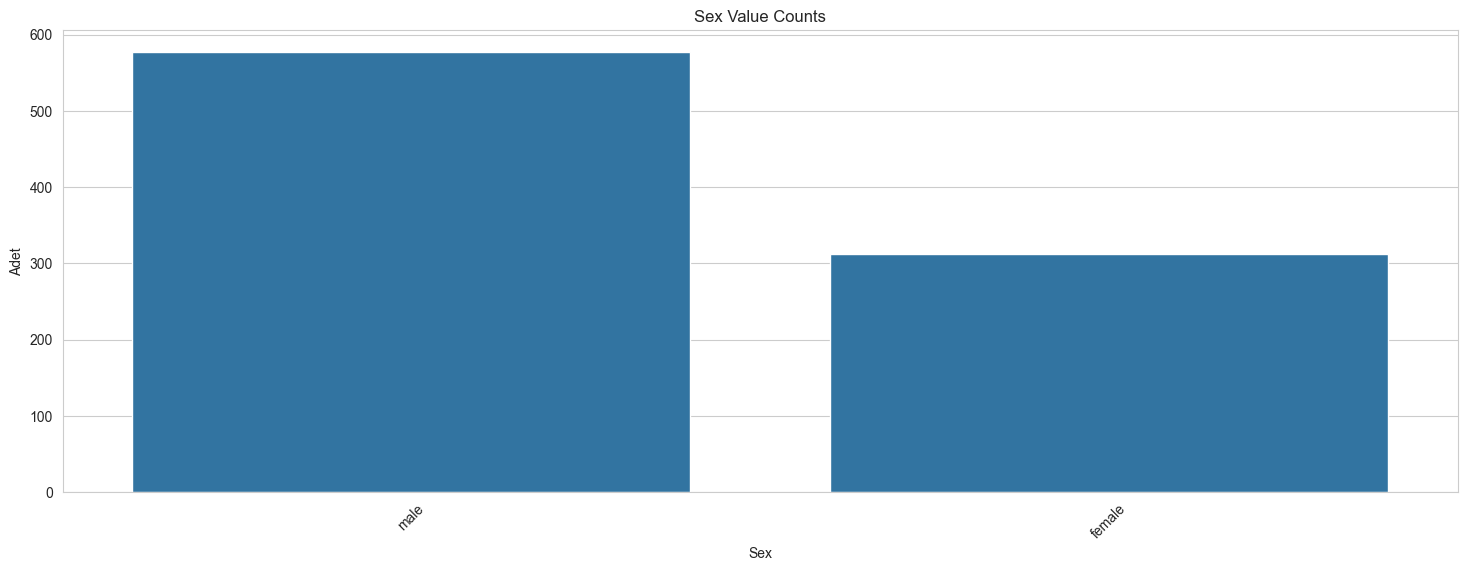

In [396]:
cat_figures["Sex_value_counts"]

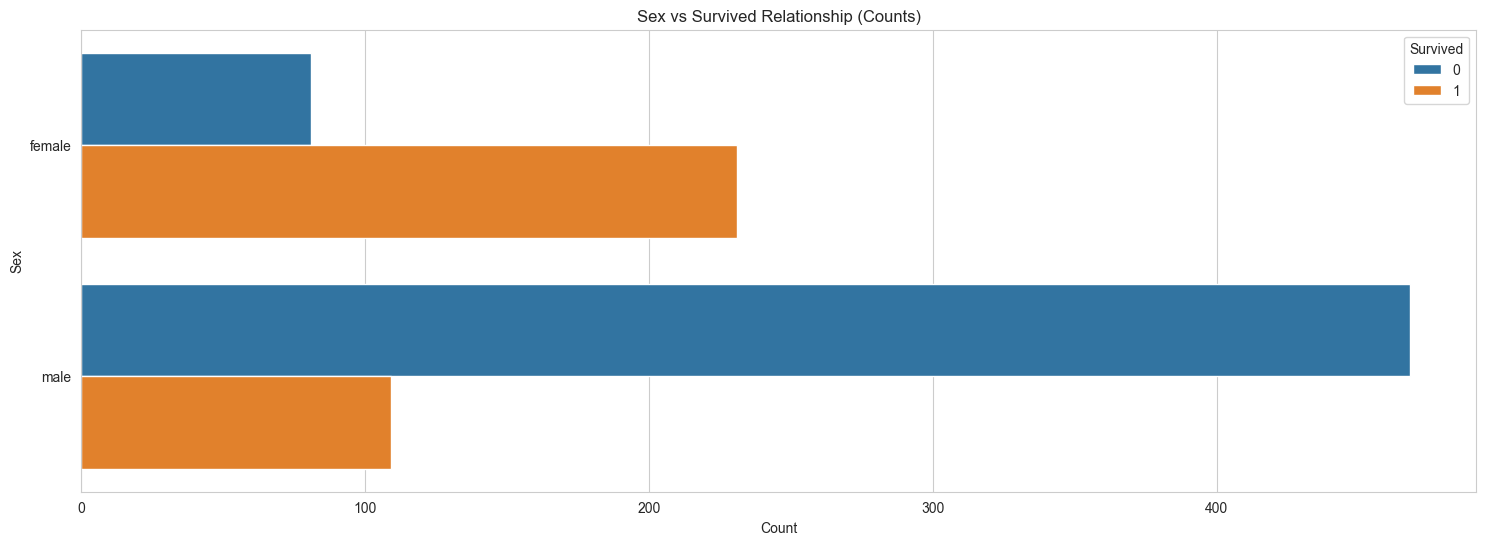

In [397]:
cat_figures["Sex_Survived_counts"]

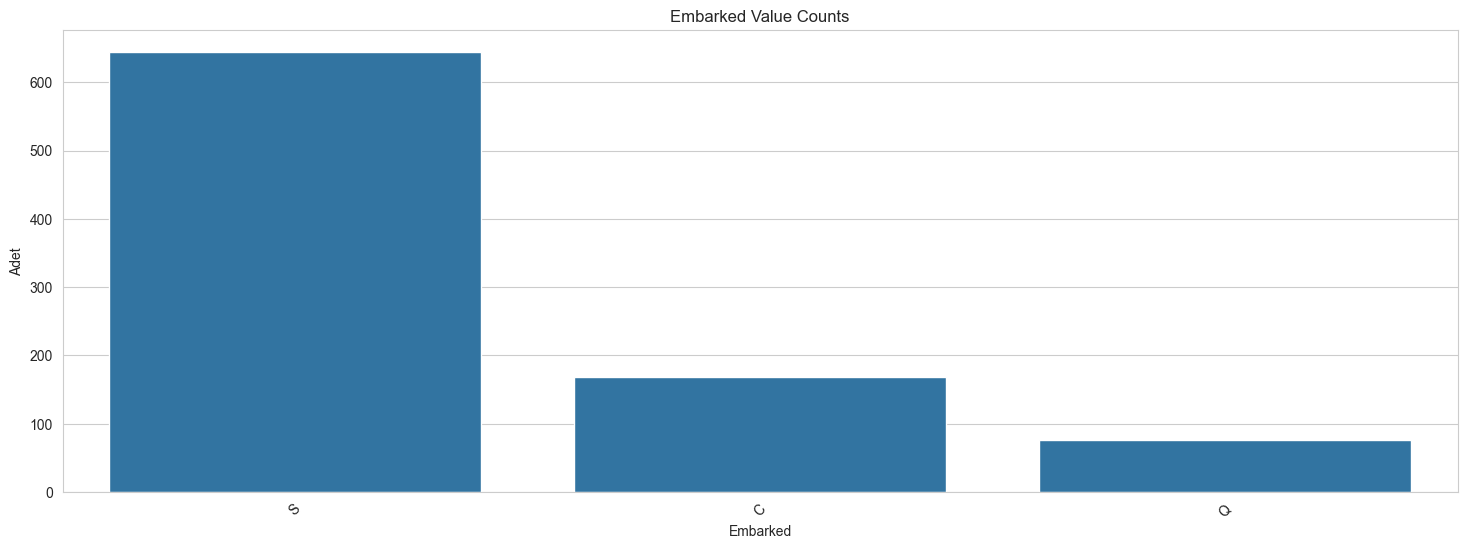

In [398]:
cat_figures["Embarked_value_counts"]

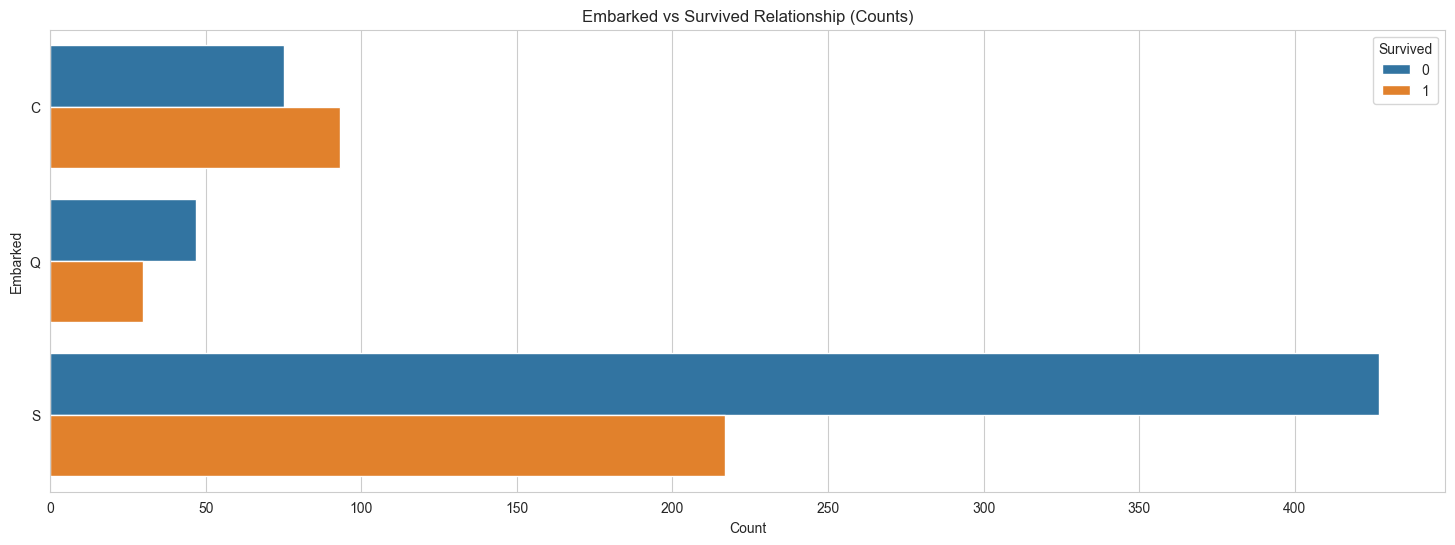

In [399]:
cat_figures["Embarked_Survived_counts"]

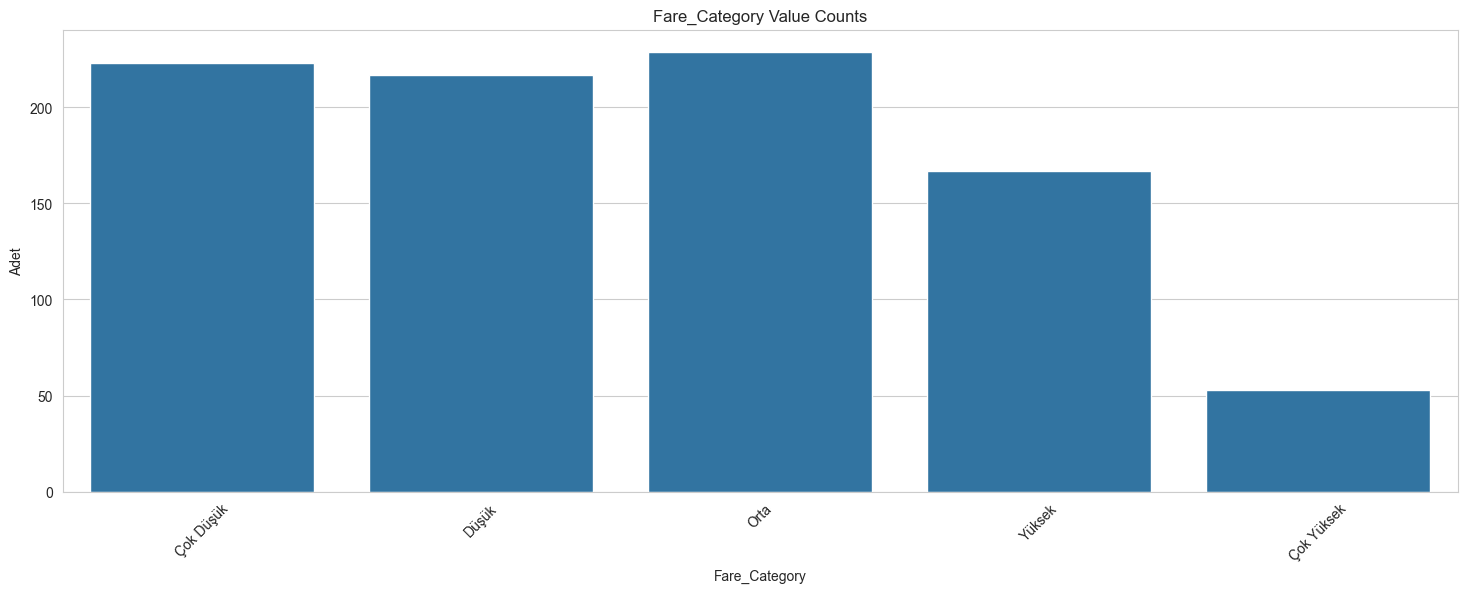

In [400]:
cat_figures["Fare_Category_value_counts"]

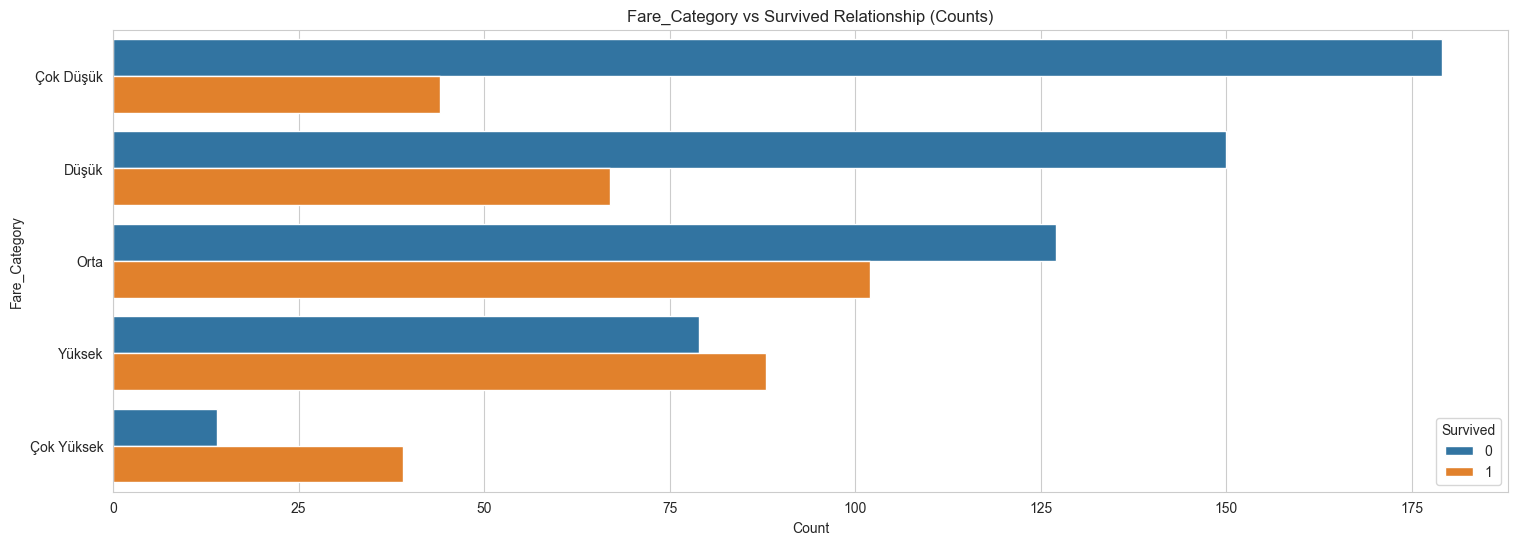

In [401]:
cat_figures["Fare_Category_Survived_counts"]

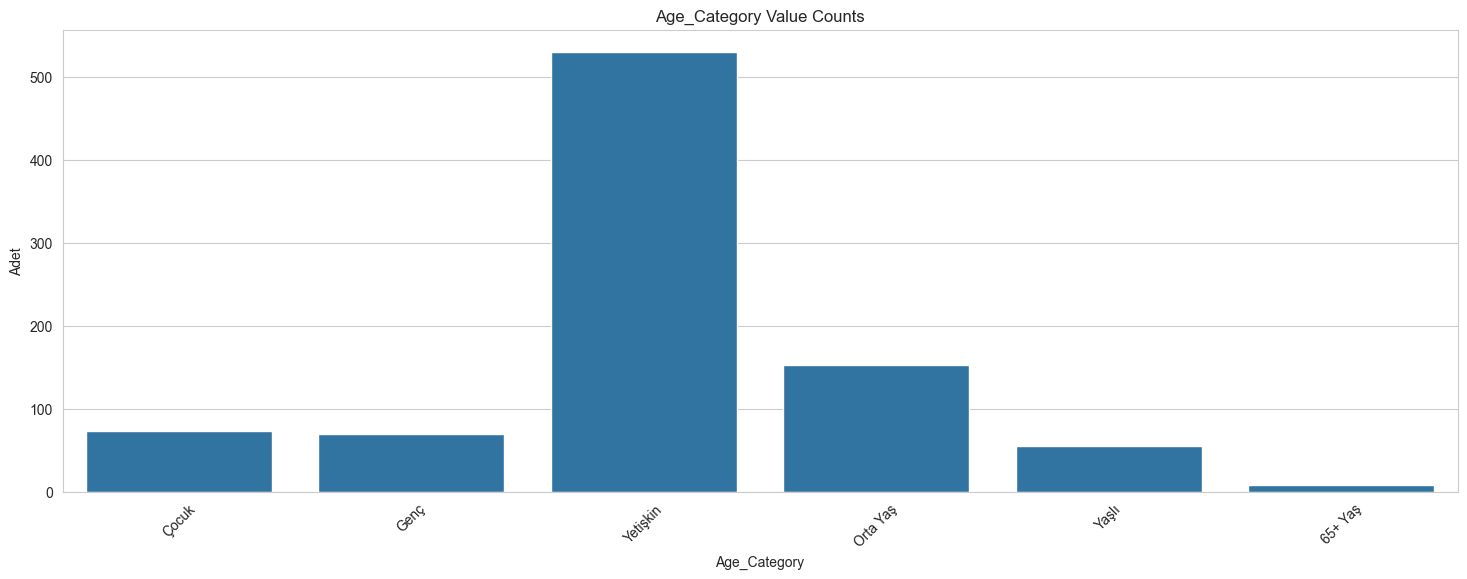

In [402]:
cat_figures["Age_Category_value_counts"]

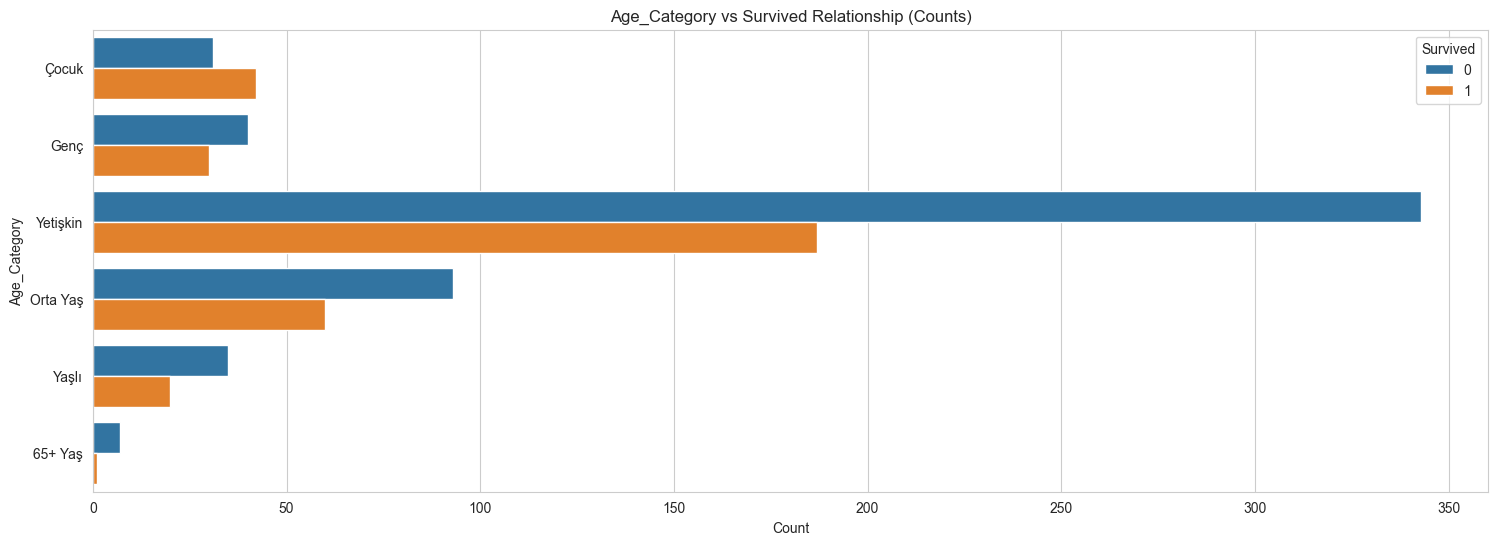

In [403]:
cat_figures["Age_Category_Survived_counts"]

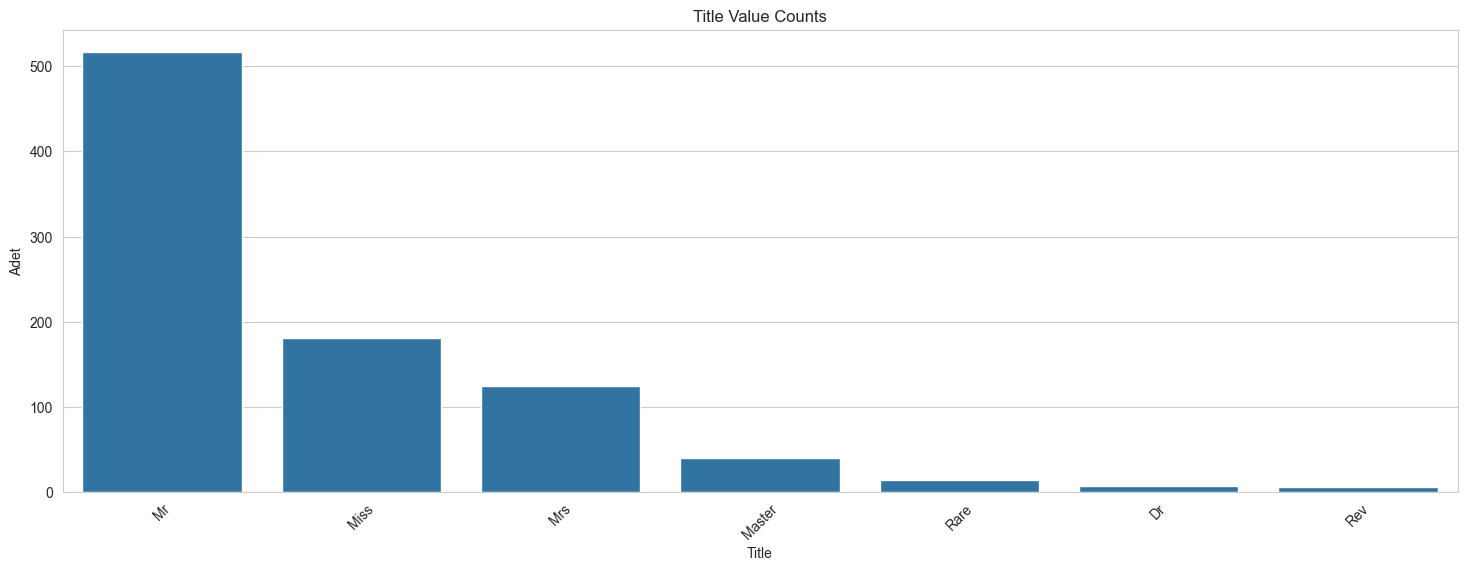

In [404]:
cat_figures["Title_value_counts"]

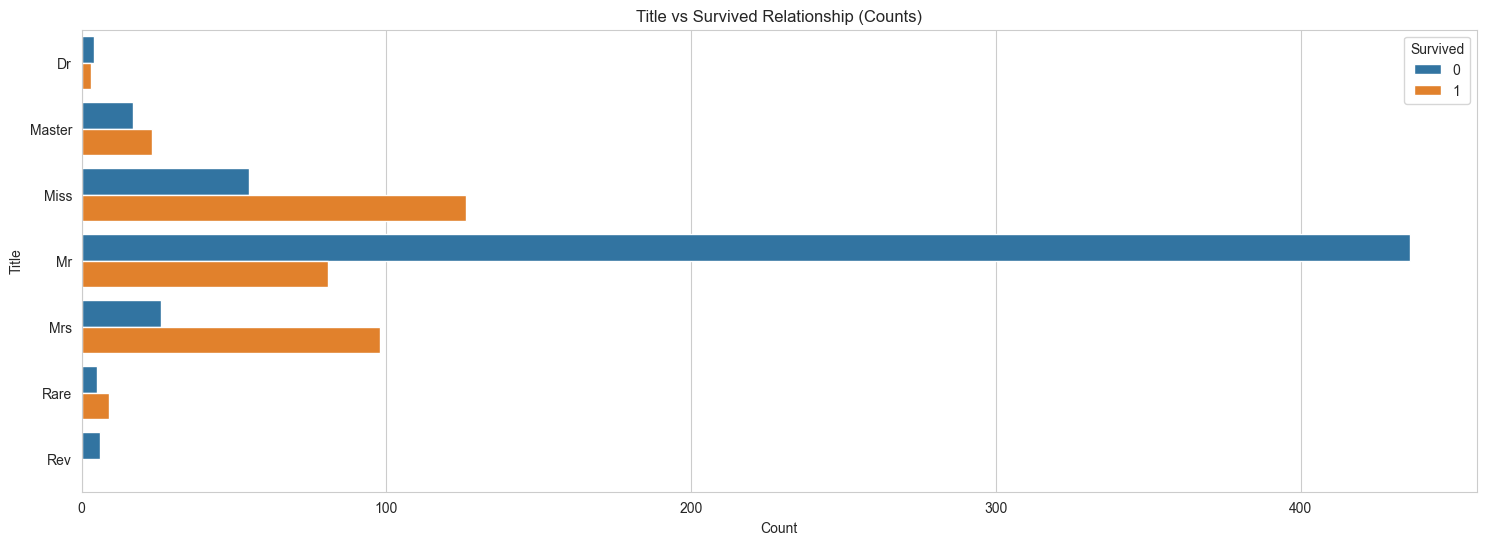

In [405]:
cat_figures["Title_Survived_counts"]

çok para verenlerin çoğu hayatta kalmış belli ki paranın hayat üzerine bir nüfuzu var

## Numerical Variable

# Outliers

## Outlier Detection

In [406]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Fare_Category,Age_Category,Title,Cabin_Known,Deck,Cabin_Number,Cabin_Group,Cabin_Count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,Çok Düşük,Yetişkin,Mr,0,U,NaN,NaN,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Yüksek,Orta Yaş,Mrs,1,C,85.0,50-100,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,Düşük,Yetişkin,Miss,0,U,NaN,NaN,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Yüksek,Yetişkin,Mrs,1,C,123.0,100-150,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,Düşük,Yetişkin,Mr,0,U,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,1,Düşük,Yetişkin,Rev,0,U,NaN,NaN,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Orta,Yetişkin,Miss,1,B,42.0,0-50,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,Unknown,S,4,Orta,Yetişkin,Miss,0,U,NaN,NaN,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Orta,Yetişkin,Mr,1,C,148.0,100-150,1


In [407]:
outliers = check_outliers(train_data, num_cols)

In [408]:
train_data.loc[outliers["Fare"]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Fare_Category,Age_Category,Title,Cabin_Known,Deck,Cabin_Number,Cabin_Group,Cabin_Count
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Yüksek,Orta Yaş,Mrs,1,C,85.0,50-100,1
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,Çok Yüksek,Yetişkin,Mr,1,C,23.0,0-50,3
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.0,1,0,PC 17569,146.5208,B78,C,2,Çok Yüksek,Yetişkin,Mrs,1,B,78.0,50-100,1
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,Unknown,C,2,Yüksek,Yetişkin,Mr,0,U,NaN,NaN,0
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,2,Yüksek,Orta Yaş,Mrs,1,D,33.0,0-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,"Sage, Mr. Douglas Bullen",male,30.0,8,2,CA. 2343,69.5500,Unknown,S,11,Yüksek,Yetişkin,Mr,0,U,NaN,NaN,0
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,35.0,1,0,17453,89.1042,C92,C,2,Yüksek,Yetişkin,Mrs,1,C,92.0,50-100,1
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,Unknown,S,3,Çok Yüksek,Orta Yaş,Mrs,0,U,NaN,NaN,0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.0,8,2,CA. 2343,69.5500,Unknown,S,11,Yüksek,Yetişkin,Miss,0,U,NaN,NaN,0
